<a href="https://colab.research.google.com/github/ainejerry/wine_repo/blob/main/PROJECT_2_WINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
#load the data set
fpath = '/content/drive/MyDrive/CodingDojo/week 7/wines_SPA.csv'
df = pd.read_csv(fpath)
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


First choice: dataset 1
1. Source of data

kaggle
2. Brief description of data

Data about wine produced by wineries around spain

3. What is the target?

price

4. What does one row represent? (A person? A business? An event? A product?)

a business

5. Is this a classification or regression problem?

regression

6. How many features does the data have?

11

7. How many rows are in the dataset?

7500

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

cleaning the data to remove unncessary characters might be one of the tasks

modelling the data around the categorical features might be a problem


In [5]:
#1) Check for class balance with value_counts
x=df.select_dtypes('object').columns
for y in x:
  print(df[y].value_counts())


Contino                                 457
Artadi                                  261
La Rioja Alta                           254
Sierra Cantabria                        237
Matarromera                             232
                                       ... 
Briego                                    1
Guillem Carol - Cellers Carol Valles      1
Particular                                1
Bodegas Asenjo & Manso                    1
Joan Simo                                 1
Name: winery, Length: 480, dtype: int64
Reserva                         467
Gran Reserva                    458
Rioja Reserva                   240
El Viejo                        224
Corimbo I                       223
                               ... 
4 Varietales Coleccion Rioja      1
Noble                             1
Primordium                        1
Finca Helena                      1
Capricho Crianza                  1
Name: wine, Length: 847, dtype: int64
2011    1190
2016     897
2015     860
201

In [4]:
# Get the number of null values for all columns and save as a variable
null_vals=df.isnull().sum()
print(null_vals)

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64


In [5]:
# Drop the country column as it has low cardinality.
df.drop('country',axis=1,inplace=True)

In [6]:
#to confirm the change
df

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [7]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df.duplicated()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows.sum()

5452

In [8]:
# Save a new filter called "duplicated_rows_all" that identifies ALL
# of the duplicated rows (including the first).
duplicated_rows_all=df.duplicated(keep=False)

# Calculate the sum of the duplicated_rows_all filter
duplicated_rows_all.sum()

5503

In [9]:
# Drop duplicates (but keep the first!)
df.drop_duplicates()
# Obtain the sum of duplicated to confirm all have been dropped
df.duplicated().sum()


5452

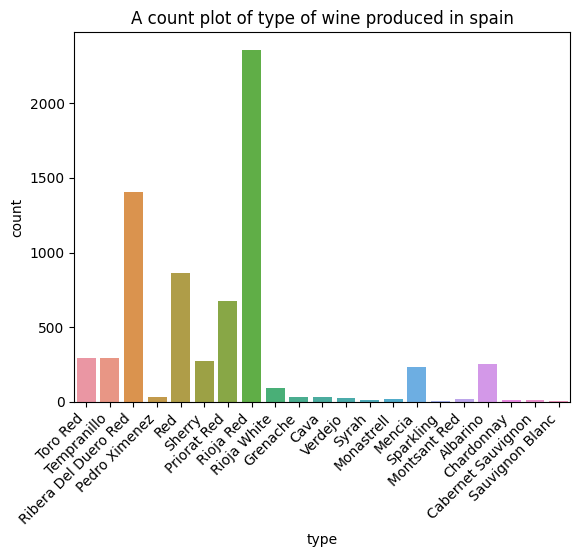

In [10]:
ax = sns.countplot(data=df, x='type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');
ax.set_title('A count plot of type of wine produced in spain');
#count plot showing rioja red wine as the most consumed in spain

In [13]:
#Heatmap to view the correlation between features.
df_correlation=df.corr(numeric_only=True)
df_correlation


,rating,num_reviews,price,body,acidity
rating,1.000000,0.015229,0.544809,0.163033,-0.094553
num_reviews,0.015229,1.000000,-0.030083,0.067106,0.040138
price,0.544809,-0.030083,1.000000,0.153624,-0.032870
body,0.163033,0.067106,0.153624,1.000000,-0.017950
acidity,-0.094553,0.040138,-0.032870,-0.017950,1.000000


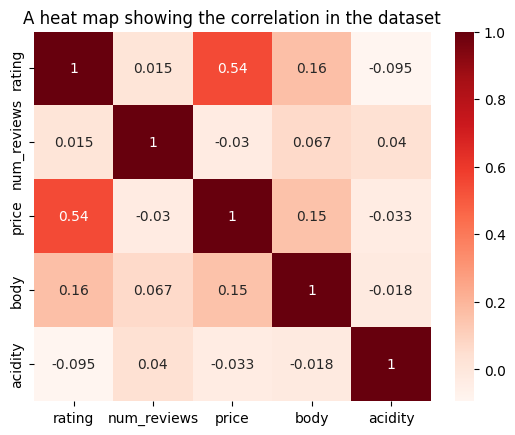

In [14]:
#heat map showing correlation of numerical features
ax=sns.heatmap(df_correlation , cmap ='Reds',annot=True);
ax.set_title('A heat map showing the correlation in the dataset');

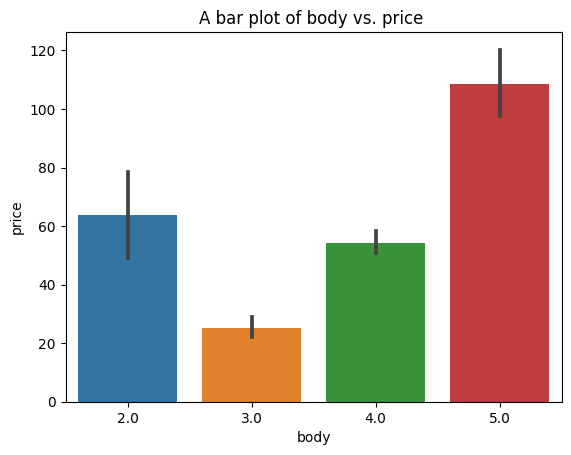

In [26]:
# barplot of body vs price
ax=sns.barplot(data=df, x='body', y='price')
ax.set_title('A bar plot of body vs. price ');

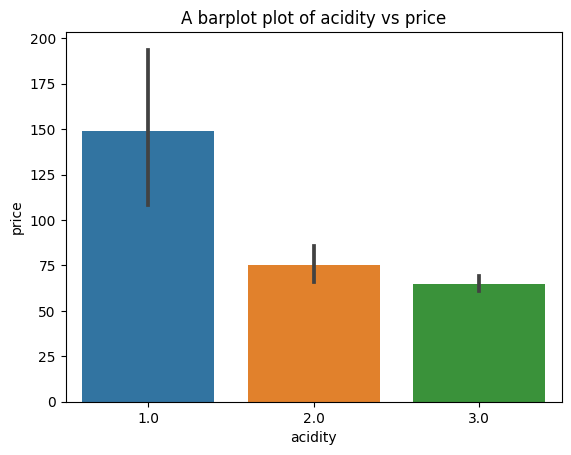

In [28]:
# Make a seaborn regplot for bmi vs. charges.
ax = sns.barplot(data=df, x="acidity", y="price");
ax.set_title('A barplot plot of acidity vs price');

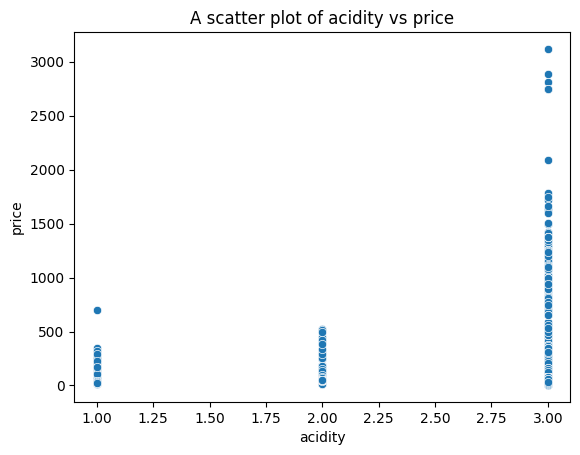

In [25]:
ax=sns.scatterplot(data=df, x='acidity', y='price')
ax.set_title('A scatter plot of acidity vs price');

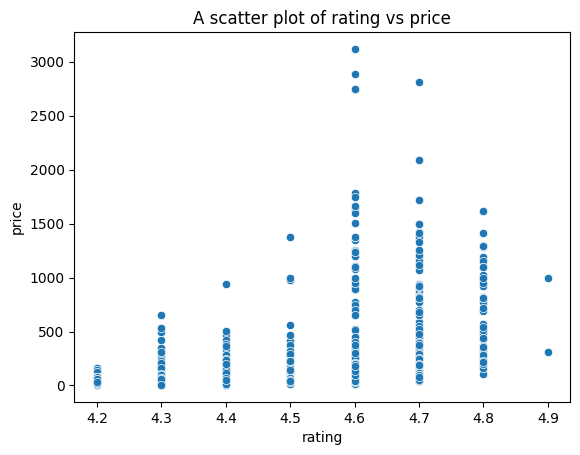

In [24]:
ax=sns.scatterplot(data=df, x='rating', y='price')
ax.set_title('A scatter plot of rating vs price');

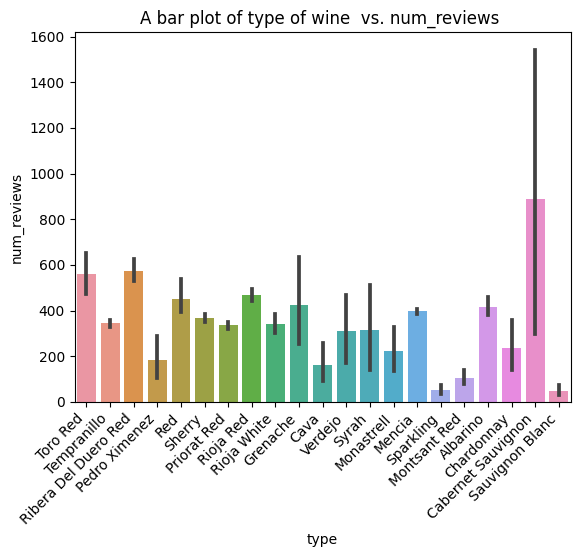

In [29]:
# barplot of body vs price
ax=sns.barplot(data=df, x='type', y='num_reviews')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');
ax.set_title('A bar plot of type of wine  vs. num_reviews ');

In [ ]:
#important imports
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
# Define features and target
X = df.drop(columns = 'price')
y = df['price']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# Save list of numeric columns
num_cols = X_train.select_dtypes('number').columns
# Constructing numeric preprocesssing objects
num_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
num_pipe = make_pipeline(num_imputer, scaler)
num_tuple = ('num',num_pipe, num_cols)
num_tuple

('num',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['rating', 'num_reviews', 'body', 'acidity'], dtype='object'))

In [ ]:
# Saving list of categorical columns
cat_cols = X_train.select_dtypes('object').columns
# Constructing categorical preprocessing objects
cat_imputer = SimpleImputer(strategy='constant', fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_pipe = make_pipeline(cat_imputer,ohe_encoder)
cat_tuple = ('cat',cat_pipe, cat_cols)
cat_tuple

('cat',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['winery', 'wine', 'year', 'region', 'type'], dtype='object'))

In [ ]:
# Define a column transformer
preprocessor  = ColumnTransformer([num_tuple, cat_tuple],
                                  verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['rating', 'num_reviews', 'body', 'acidity'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['winery', 'wine', 'year', 'region', 'type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
#function for evaluating our models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics
def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )
  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)



In [ ]:
# Instantiate a Default Model
bagreg = BaggingRegressor(random_state = 42)
# Model Pipeline with default preprocessor and default model
bagreg_pipe = make_pipeline(preprocessor, bagreg)
# Fit the model pipeline on the training data only
bagreg_pipe.fit(X_train, y_train)
# Call custom function for evaluation
evaluate_regression(bagreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 5.745
- MSE = 1,692.983
- RMSE = 41.146
- R^2 = 0.923

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 16.249
- MSE = 6,829.560
- RMSE = 82.641
- R^2 = 0.720


In [ ]:
# Obtain list of parameters
bagreg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['rating', 'num_reviews', 'body', 'acidity'], dtype='object')),
                                   ('cat',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='MISSING',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                            

In [ ]:
# Define parameters to tune
param_grid = {'baggingregressor__n_estimators': [5, 10, 20,],
              'baggingregressor__max_samples' : [.5, .7, .9, ],
              'baggingregressor__max_features': [.5, .7, .9 ]}
# Instaniate the gridsearch
gridsearch = GridSearchCV(bagreg_pipe, param_grid, n_jobs=-1, verbose=1)
# Fit the gridsearch on the training data
gridsearch.fit(X_train, y_train)
# Obtain the best paramters from the gridsearch
gridsearch.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'baggingregressor__max_features': 0.7,
 'baggingregressor__max_samples': 0.7,
 'baggingregressor__n_estimators': 20}

In [ ]:
# Define a model with the best parameters already refit on the entire training set
best_bagreg_grid = gridsearch.best_estimator_
# Evalute the tuned model
evaluate_regression(best_bagreg_grid, X_train, y_train, X_test, y_test)



------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 8.033
- MSE = 2,025.987
- RMSE = 45.011
- R^2 = 0.908

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 17.043
- MSE = 6,311.141
- RMSE = 79.443
- R^2 = 0.741


In [ ]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

In [ ]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['rating', 'num_reviews', 'body', 'acidity'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['winery', 'wine', 'year', 'region', 'type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 5.188
- MSE = 980.544
- RMSE = 31.314
- R^2 = 0.955

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 16.273
- MSE = 6,317.647
- RMSE = 79.484
- R^2 = 0.741


In [ ]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['rating', 'num_reviews', 'body', 'acidity'], dtype='object')),
                                   ('cat',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='MISSING',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                            

In [ ]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,100,150],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          }

In [ ]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 3, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['rating', 'num_reviews', 'body', 'acidity'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='MISSING',
                                                                                                        s...
                                                                         Index(['winery', 'wine', 'year', 'region', 'type'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': [10, 100, 150]},
             verbose=1)

In [ ]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__n_estimators': 150}

In [ ]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 9.078
- MSE = 2,758.988
- RMSE = 52.526
- R^2 = 0.875

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 17.958
- MSE = 6,139.403
- RMSE = 78.354
- R^2 = 0.748


In [ ]:
median_rate = df['rating'].median()
def bin_rate(rating):
  if rating > median_rate:
    return 'GOOD WINE'
  else:
    return 'BAD WINE'

In [ ]:
df['nature'] = df['rating'].apply(bin_rate)
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity,nature
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0,GOOD WINE
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0,GOOD WINE
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0,GOOD WINE
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0,GOOD WINE
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0,GOOD WINE


In [ ]:
# Define features and target
X = df.drop(columns = 'price')
y = df['price']
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# Save list of numeric columns
num_cols = X_train.select_dtypes('number').columns
# Constructing numeric preprocesssing objects
num_imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
num_pipe = make_pipeline(num_imputer, scaler)
num_tuple = ('num',num_pipe, num_cols)
num_tuple

('num',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['rating', 'num_reviews', 'body', 'acidity'], dtype='object'))

In [ ]:
# Saving list of categorical columns
cat_cols = X_train.select_dtypes('object').columns
# Constructing categorical preprocessing objects
cat_imputer = SimpleImputer(strategy='constant', fill_value='MISSING')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_pipe = make_pipeline(cat_imputer,ohe_encoder)
cat_tuple = ('cat',cat_pipe, cat_cols)
cat_tuple

('cat',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['winery', 'wine', 'year', 'region', 'type', 'nature'], dtype='object'))

In [ ]:
# Define a column transformer
prepro  = ColumnTransformer([num_tuple, cat_tuple],
                                  verbose_feature_names_out=False)
prepro

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['rating', 'num_reviews', 'body', 'acidity'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['winery', 'wine', 'year', 'region', 'type', 'nature'], dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(prepro, rf)

In [ ]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['rating', 'num_reviews', 'body', 'acidity'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='MISSING',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['winery', 'wine', 'year', 'region', 'type', 'nature'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 5.236
- MSE = 999.885
- RMSE = 31.621
- R^2 = 0.955

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 16.070
- MSE = 6,149.574
- RMSE = 78.419
- R^2 = 0.748


In [ ]:
# Parameters for tuning
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['rating', 'num_reviews', 'body', 'acidity'], dtype='object')),
                                   ('cat',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='MISSING',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                            

In [ ]:
# Define param grid with options to try
params = {'randomforestregressor__max_depth': [None,10,15,20],
          'randomforestregressor__n_estimators':[10,100,150],
          'randomforestregressor__min_samples_leaf':[2,3,4],
          }

In [ ]:
# Instantiate the gridsearch
gridsearch = GridSearchCV(rf_pipe, params, n_jobs=-1, cv = 3, verbose=1)
# Fit the gridsearch on training data
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['rating', 'num_reviews', 'body', 'acidity'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_value='MISSING',
                                                                                                        s...
                                                                         Index(['winery', 'wine', 'year', 'region', 'type', 'nature'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [None, 10, 15, 20],
                         'randomforestregressor__min_samples_leaf': [2, 3, 4],
                         'randomforestregressor__n_estimators': [10, 100, 150]},
             verbose=1)

In [ ]:
# Obtain best parameters
gridsearch.best_params_

{'randomforestregressor__max_depth': 20,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__n_estimators': 150}

In [ ]:
# Define and refit best model
best_rf = gridsearch.best_estimator_
evaluate_regression(best_rf, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 10.538
- MSE = 2,844.796
- RMSE = 53.337
- R^2 = 0.871

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 18.327
- MSE = 6,138.832
- RMSE = 78.351
- R^2 = 0.748


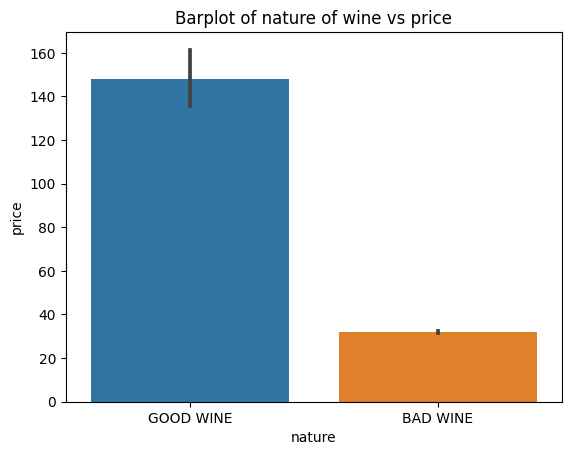

In [ ]:
# Create a barplot of smoker vs charges, colored by sex
ax = sns.barplot(data=df, x='nature', y='price')
ax.set_title('Barplot of nature of wine vs price');

**Choose your "production" model and justify this decision using the metrics most important to your business problem.**

i choose the fine tuned random forest which was applied to the data set that had a string column of nature of wine which described whine as good or bad depending on the median of the rating column.As its R-squared value on the test data was close to one